https://www.youtube.com/watch?v=2eeYqJ0uBKE

#### 1. Setup Mario environment

In [17]:
#!pip install gym_super_mario_bros==7.3.0 
#!pip install nes_py==8.1.8
#!pip install gym==0.17.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 6.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 334.6 kB/s eta 0:00:0000:0100:04
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 kB 324.1 kB/s eta 0:00:0000:0100:01
  Created wheel for gym: filename=gym-0.17.2-py3-none-any.whl size=1650855 sha256=0608b99d47a70041a511654fb8a81ae5dd969aec1274736d2bfdf8c14fd4368e
  Stored in directory: /home/marcelo.hurtado/.cache/pip/wheels/ab/09/cc/180c3b0fe6c05efdf77b2963ff2e2e56327c4d23d0781b5dd9
Successfully built gym
  Attempting uninstall: cloudpickle
    Found existing installation: cloudpickle 3.0.0
    Uninstalling cloudpickle-3.0.0:
      Successfully uninstalled cloudpickle-3.0.0
  Attempting uninstall: pyglet
    Found existing installat

In [1]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [2]:
#Setup the game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env.action_space #256 combinations
env = JoypadSpace(env, SIMPLE_MOVEMENT) #Simplify actions space
env.action_space #7 combinations
env.observation_space.shape

(240, 256, 3)

In [20]:
SIMPLE_MOVEMENT[env.action_space.sample()]

['right', 'A', 'B']

In [4]:
#Create a flag - restart or not
done = True
#Loop through each frame in the game
for step in range(100000):
    # Start the game to begin with
    if done:
        #Start the game
        env.reset()
    # Do random actions
    state, reward, done, info = env.step(env.action_space.sample())
    # Show the game on the screen
    env.render()
# Close the game
env.close()

/home/marcelo.hurtado/miniforge3/envs/RL-mario/lib/python3.9/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 

In [6]:
state = env.reset()
len(env.step(1))
env.step(1)[0] #New state
env.step(1)[1] #Reward
env.step(1)[2] #Dead or not
env.step(1)[3] #Info

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 400,
 'world': 1,
 'x_pos': 40,
 'x_pos_screen': 40,
 'y_pos': 79}

#### 2. Pre-processing environment

In [8]:
#Install pytorch
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html
#Install stable baselines for RL stuff
#!pip install stable-baselines3[extra]==1.3.0

  Using cached stable_baselines3-1.3.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
  Using cached werkzeug-3.0.2-py3-none-any.whl.metadata (4.1 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.5/159.5 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [3]:
# Import Frame Stacker Wrapper and GrayScaling Wrapper
from gym.wrappers import GrayScaleObservation
# Import Vectorization Wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

/home/marcelo.hurtado/miniforge3/envs/RL-mario/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1. Create the base environment

In [4]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

2. Simplify the controls

In [5]:
env = JoypadSpace(env, SIMPLE_MOVEMENT) #Simplify actions space

3. Grayscale

(240, 256, 3)


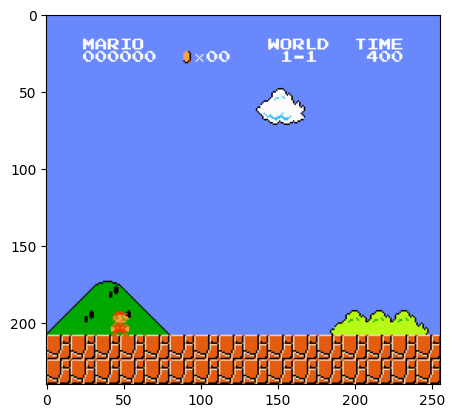

In [6]:
state = env.reset()
print(state.shape)
plt.imshow(state)

(240, 256, 1)


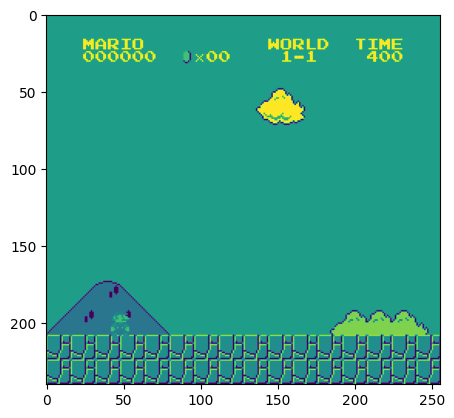

In [7]:
env = GrayScaleObservation(env, keep_dim=True)
state = env.reset()
print(state.shape)
plt.imshow(state)

4. Wrap inside the dummy environment

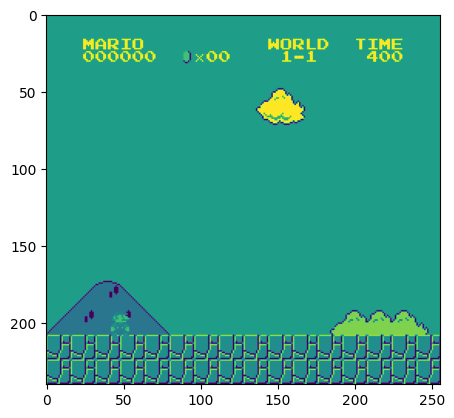

In [8]:
env = DummyVecEnv([lambda: env])
state = env.reset()
state.shape #Add 1 more dimension (1, 240, 256, 1)
plt.imshow(state[0])

5. Stack the frames

(1, 240, 256, 4)


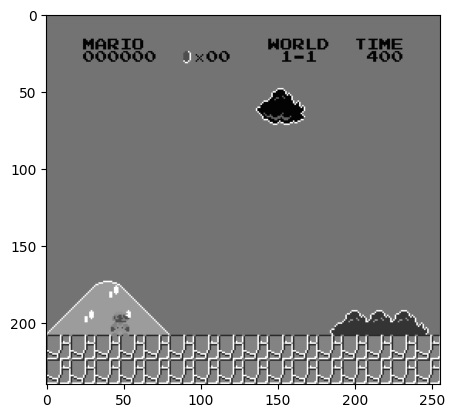

In [9]:
env = VecFrameStack(env, 4, channels_order='last') # 4 is how many frames we want to stack
state = env.reset()
print(state.shape)
plt.imshow(state[0])

<function matplotlib.pyplot.show(close=None, block=None)>

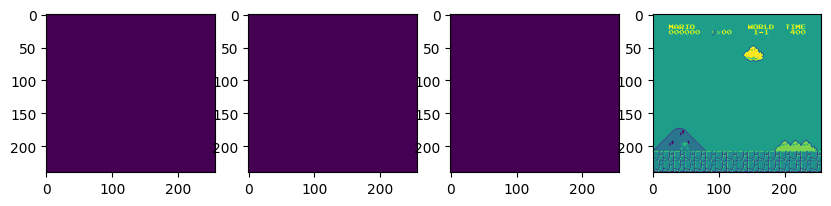

In [10]:
plt.figure(figsize=(10,8))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show

#### 3. Train the RL model

In [11]:
#Import os for file path managment
import os
#Import PPO algorithm
from stable_baselines3 import PPO
#Import base callback for saving models
from stable_baselines3.common.callbacks import BaseCallback

In [12]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [13]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [18]:
# Setup model saving callback
callback = TrainAndLoggingCallback(check_freq=10000, save_path=CHECKPOINT_DIR)

In [19]:
# This is the AI model started
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)
# Policy = 'CnnPolicy' = Convolutional neuronal policy 

Using cpu device
Wrapping the env in a VecTransposeImage.


In [20]:
# Train the AI model
model.learn(total_timesteps=4000000, callback=callback)
# total_timesteps is how many frames the AI is going to see

Logging to ./logs/PPO_3


/home/marcelo.hurtado/miniforge3/envs/RL-mario/lib/python3.9/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 143 |
|    iterations      | 1   |
|    time_elapsed    | 3   |
|    total_timesteps | 512 |
----------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 34            |
|    iterations           | 2             |
|    time_elapsed         | 29            |
|    total_timesteps      | 1024          |
| train/                  |               |
|    approx_kl            | 1.4406978e-05 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.95         |
|    explained_variance   | -0.00274      |
|    learning_rate        | 1e-06         |
|    loss                 | 229           |
|    n_updates            | 10            |
|    policy_gradient_loss | -0.000149     |
|    value_loss           | 534           |
-------------------------------------------
-----

KeyboardInterrupt: 

#### 4. Test it out

In [21]:
model = PPO.load('train/best_model_10000.zip')

In [22]:
state = env.reset()
SIMPLE_MOVEMENT[model.predict(state)[0][0]]

['right']

In [23]:
#Start the game
state = env.reset()
#Loop through the game
while True:
    action, _state = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()

/home/marcelo.hurtado/miniforge3/envs/RL-mario/lib/python3.9/site-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in scalar subtract
  return (self.ram[0x86] - self.ram[0x071c]) % 256


KeyboardInterrupt: 